# Loading the dataset

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sales_df = pd.read_csv( 'Advertising.csv' )
# Pring first few records
sales_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Set X and Y Variable

In [ ]:
X = sales_df[['TV','Radio','Newspaper']]
Y = sales_df['Sales']

# Standardize X & Y

In [ ]:
Y = np.array( (Y - Y.mean() ) / Y.std() )
X = X.apply( lambda rec: ( rec - rec.mean() ) / rec.std(),
axis = 0 )

# Implementing the Gradient Descent Algorithm
#  Random Initialization the bias and weights

In [ ]:
import random
def initialize(dim):  #dim means total weights we want to initialize
  np.random.seed(seed=48)
  random.seed(48)
  b=random.random()    #Initialize the bias
  theta=np.random.rand(dim)      #Initialize the weights.
  return b,theta

In [ ]:
b,theta=initialize(3)
print("Bias: ",b,"Weights: ",theta)

Bias:  0.5481578284163297 Weights:  [0.01749027 0.89157327 0.28486117]


# Predict Y values from the bias and weights

In [ ]:
# Inputs:
# b - bias
# w - weights
# X - the input matrix
def predict_Y(b,theta,X):
  return b + np.dot(X,theta)

In [ ]:
b,theta=initialize(3)
Y_hat=predict_Y(b,theta,X)

In [ ]:
Y_hat[0:10]

array([ 1.94347107,  1.68051333,  2.38782416,  1.99768448,  0.17077454,
        2.64080222,  1.01030207,  0.0747452 , -1.13753784, -0.80434768])

In [ ]:
Y.shape

(200,)

# Calculate the cost function: MSE

In [ ]:
import math
# Inputs
# Y - Actual values of y
# Y_hat - predicted value of y
def get_cost(Y,Y_hat):
  Y_resd=Y-Y_hat      # Calculating the residuals from taking difference between actual and predicted values
  return np.sum(np.dot(Y_resd.T,Y_resd))/(2*len(Y-Y_resd))

In [ ]:
b,theta=initialize(3)
Y_hat=predict_Y(b,theta,X)
get_cost(Y,Y_hat)

0.5848426908419545

# Update the bias and weights

In [ ]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
  #gradient of bias
  db=(np.sum(y_hat-y))/len(y)
  #gradient of weights
  dw=(np.sum(np.dot((y_hat-y),x)))/len(y)
    #update bias
  b_1=b_0-learning_rate*db
#update theta
  theta_1=theta_o-learning_rate*dw
    #return the new bias and beta values
  return b_1,theta_1

In [ ]:
b,theta=initialize(3)
print("After initialization -Bias: ",b,"theta: ",theta)
Y_hat=predict_Y(b,theta,X)
b,theta=update_theta(X,Y,Y_hat,b,theta,0.001)
print("After first update -Bias: ",b,"theta: ",theta)
#get_cost(Y,Y_hat)

After initialization -Bias:  0.5481578284163297 theta:  [0.01749027 0.89157327 0.28486117]
After first update -Bias:  0.5476096705879133 theta:  [0.01740001 0.89148301 0.28477091]


# Finding the optimal bias and weights

In [ ]:
def run_gradient_descent(X,
                         Y,
                         alpha=0.001,
                         num_iterations=500):
# Intialize the bias and weights
  b,theta=initialize(X.shape[1])
  iter_num=0
  # gd_iterations_df keeps track of the cost every 10 iterations
  gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
  result_idx=0
    
    # Run the iterations in loop

  for each_iter in range(num_iterations):
    Y_hat=predict_Y(b,theta,X)          # Calcuated predicted value of y
    this_cost=get_cost(Y,Y_hat)         # Calculate the cost
    prev_b=b                            # Save the previous bias and weights
    prev_theta=theta
    b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)       # Update and calculate the new values of bias and weights

    if(iter_num%10==0):                                       # For every 10 iterations, store the cost i.e. MSE
      gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
      result_idx=result_idx+1
    iter_num +=1
  print("Final Estimate of b and theta : ",b,theta)
#return the final bias, weights and the cost at the end

  return gd_iterations_df,b,theta

In [ ]:
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=500)

Final Estimate of b and theta :  0.33239136561249305 [-0.00233302  0.87174997  0.26503787]


In [ ]:
gd_iterations_df[0:20]

,iteration,cost
0,0.0,0.584843
1,10.0,0.581788
2,20.0,0.578798
3,30.0,0.575871
4,40.0,0.573006
5,50.0,0.570201
6,60.0,0.567455
7,70.0,0.564766
8,80.0,0.562134
9,90.0,0.559556


# Plotting the cost function against the iterations

Text(0, 0.5, 'Cost or MSE')

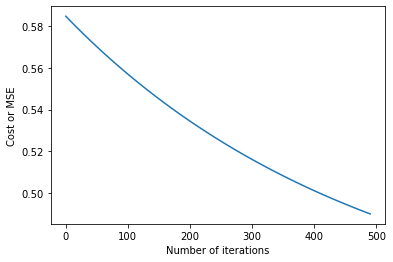

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

In [ ]:
alpha_df_1,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=500)

Final Estimate of b and theta :  0.33239136561249305 [-0.00233302  0.87174997  0.26503787]


In [ ]:
alpha_df_2,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=500)

Final Estimate of b and theta :  0.0036016617161771587 [-0.00558474  0.86849826  0.26178616]


In [ ]:
alpha_df_3,b,theta=run_gradient_descent(X,Y,alpha=0.5,num_iterations=500)

Final Estimate of b and theta :  8.315437629165749e-16 [-0.00558474  0.86849826  0.26178616]


In [ ]:
#alpha_df_2,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=3000)

Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

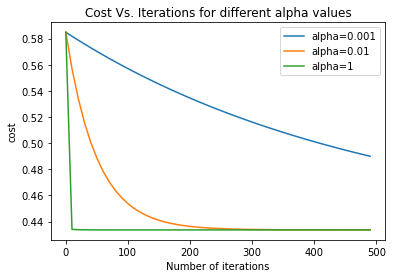

In [ ]:
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label="alpha=0.001")
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label="alpha=0.01")
plt.plot(alpha_df_3['iteration'],alpha_df_3['cost'],label="alpha=1")
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')